Hi! In this code I am implementing MNIST(handwritten digit recognition), using a convolutional neural network by Keras, TensorFlow.

1-Importing necessary libraries:

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D
import matplotlib.pyplot as plt

2-Loading the MNIST dataset, provided by Keras:

In [3]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
print('x_train shape: ',x_train.shape,'  y_train shape: ',y_train.shape)
print('x_test shape: ',x_test.shape,'  y_test shape: ',y_test.shape)

x_train shape:  (60000, 28, 28)   y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)   y_test shape:  (10000,)


3-Visualizing the dataset:

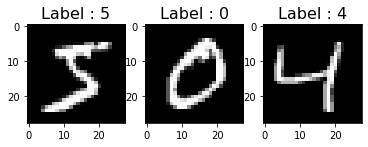

In [4]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title("Label : {}".format(y_train[i]),fontsize=16)
plt.show()

5-Converting y_train and y_test from label to one-hot vector:

In [5]:
index = np.random.choice(len(y_test))
print('Random element of y_train and y_test in raw format: ',y_train[index],y_test[index])
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
print('Random element of y_train and y_test after change: ',y_train[index],y_test[index])

Random element of y_train and y_test in raw format:  2 7
Random element of y_train and y_test after change:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


6-Normalizing x_train and x_test from 0-255 input values to 0-1:

In [6]:
print('random row vector of x_train and x_test in raw format:')
first_index, second_index = np.random.choice(len(x_test)), np.random.randint(10,20)
print(x_test[first_index,second_index],'\nand\n',x_train[first_index,second_index])
print('\n\nrandom row vector of x_train and x_test after normalization:')
x_test, x_train = x_test/255, x_train/255
print(x_test[first_index,second_index],'\nand\n',x_train[first_index,second_index])

random row vector of x_train and x_test in raw format:
[  0   0   0   0   0   0   0   0   0   0   0   0  26 172 228   0   0   0
   0   0   0   0   0   0   0   0   0   0] 
and
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  64  64 191 255 255
 255 128   0   0   0   0   0   0   0   0]


random row vector of x_train and x_test after normalization:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.10196078 0.6745098  0.89411765 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ] 
and
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.25098039 0.25098039 0.74901961 1.         1.
 1.         0.50196078 0.         0.         0.         0.
 0.         0.         0.         0.        ]


7-Building convolutional neural network:

In [8]:
model = keras.Sequential()
model.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

8-Compiling model with passing loss function type, optimizer type and measured accuracy:

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 7744)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1982720   
                                                      

9-Training the model:

In [10]:
history = model.fit(x_train,y_train,validation_split=0.2,epochs=8,batch_size=512)

2022-12-01 12:41:26.565976: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/8


2022-12-01 12:41:29.064767: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 44302336 exceeds 10% of free system memory.
2022-12-01 12:41:29.320929: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 63438848 exceeds 10% of free system memory.
2022-12-01 12:41:31.587755: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 63438848 exceeds 10% of free system memory.
2022-12-01 12:41:31.942540: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 44302336 exceeds 10% of free system memory.


94/94 [==============================] - 705s 7s/step - loss: 0.2964 - accuracy: 0.9097 - val_loss: 0.0741 - val_accuracy: 0.9787
Epoch 2/8
94/94 [==============================] - 537s 6s/step - loss: 0.0690 - accuracy: 0.9791 - val_loss: 0.0502 - val_accuracy: 0.9852
Epoch 3/8
94/94 [==============================] - 513s 5s/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0414 - val_accuracy: 0.9874
Epoch 4/8
94/94 [==============================] - 576s 6s/step - loss: 0.0386 - accuracy: 0.9873 - val_loss: 0.0446 - val_accuracy: 0.9877
Epoch 5/8
94/94 [==============================] - 478s 5s/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0402 - val_accuracy: 0.9879
Epoch 6/8
94/94 [==============================] - 376s 4s/step - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 7/8
94/94 [==============================] - 334s 4s/step - loss: 0.0213 - accuracy: 0.9928 - val_loss: 0.0347 - val_accuracy: 0.9907
Epoch 8/8
94/94 [=============

10-Visualizing softmax approach:

In [15]:
y_predicted = model.predict(x_test)
i = np.random.choice(y_test.shape[0])
print(y_predicted[i])
print('The highest prabablity is :',np.max(y_predicted[i]))

313/313 [==============================] - 11s 34ms/step
[2.6160820e-13 2.1258419e-09 1.4024110e-06 4.9332161e-06 1.1597642e-07
 8.9366194e-09 1.0686920e-16 9.9997634e-01 4.1447304e-08 1.7098802e-05]
The highest prabablity is : 0.99997634


11-Taking the max number(highest probablity) from every predicted y vector and replacing the whole vector with index of max:

In [17]:
final_y_predicted = np.argmax(y_predicted,axis=1)
print(final_y_predicted[i])

7


12-Checking a random test example:

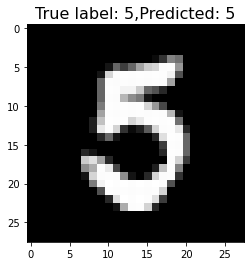

Certainty: % 99.83553886413574


In [22]:
i = np.random.choice(len(x_test))
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('True label: {},Predicted: {}'.format(y_test[i].argmax(),final_y_predicted[i]),fontsize=16)
plt.show()
print('Certainty: %',np.max(y_predicted[i])*100)

13-Evaluating the model:

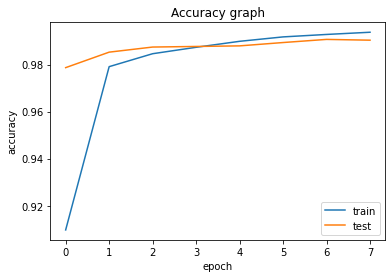

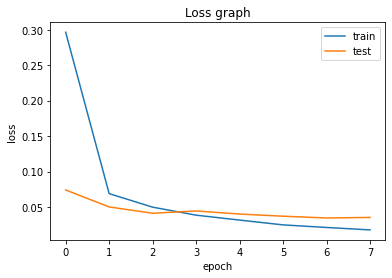

313/313 [==============================] - 11s 34ms/step - loss: 0.0265 - accuracy: 0.9909
Loss for test set:  0.026520151644945145
Accuracy for test set:  0.9908999800682068


In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss for test set: ",test_loss)
print("Accuracy for test set: ",test_acc)